<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64


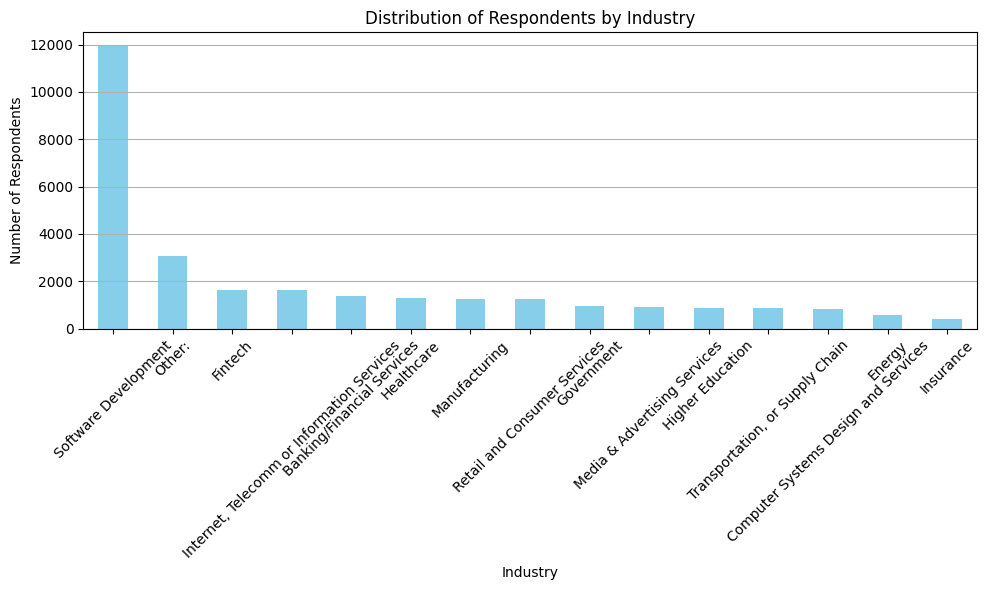

In [6]:
# Count the number of respondents in each industry
industry_counts = df['Industry'].value_counts()

# Print the counts for reference
print(industry_counts)

# Plot a bar chart
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Display the bar chart
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [7]:
# Calculate basic statistics
mean_compensation = df['ConvertedCompYearly'].mean()
median_compensation = df['ConvertedCompYearly'].median()
std_dev_compensation = df['ConvertedCompYearly'].std()

# Display the results
print(f'Mean: {mean_compensation}')
print(f'Median: {median_compensation}')
print(f'Standard Deviation: {std_dev_compensation}')


# Define the threshold for outliers (3 standard deviations above the mean)
threshold = mean_compensation + 3 * std_dev_compensation

# Identify compensation values exceeding the threshold
outliers = df[df['ConvertedCompYearly'] > threshold]

# Print outliers
print(f'Compensation values exceeding {threshold}:')
print(outliers)

Mean: 86155.28726264134
Median: 65000.0
Standard Deviation: 186756.97308629757
Compensation values exceeding 646426.2065215341:
       ResponseId                                         MainBranch  \
529           530                     I am a developer by profession   
828           829                     I am a developer by profession   
1932         1933                     I am a developer by profession   
2171         2172                     I am a developer by profession   
2187         2188                     I am a developer by profession   
...           ...                                                ...   
38219       38220  I am not primarily a developer, but I write co...   
39643       39644                     I am a developer by profession   
40066       40067                     I am a developer by profession   
40952       40953                     I am a developer by profession   
41027       41028                     I am a developer by profession   

       

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: 32712.0
Q3: 107971.5
IQR: 75259.5
Lower Bound for Outliers: -80177.25
Upper Bound for Outliers: 220860.75
Number of Outliers: 978
Outlier Values:
___________________________________________________________________________________
       ResponseId                      MainBranch              Age  \
428           429  I am a developer by profession  25-34 years old   
456           457  I am a developer by profession  45-54 years old   
461           462  I am a developer by profession  45-54 years old   
529           530  I am a developer by profession  25-34 years old   
545           546  I am a developer by profession  35-44 years old   
...           ...                             ...              ...   
40952       40953  I am a developer by profession  35-44 years old   
41000       41001  I am a developer by profession  35-44 years old   
41001       41002  I am a developer by profession  45-54 years old   
41027       41028  I am a developer by profession  55-64 years old

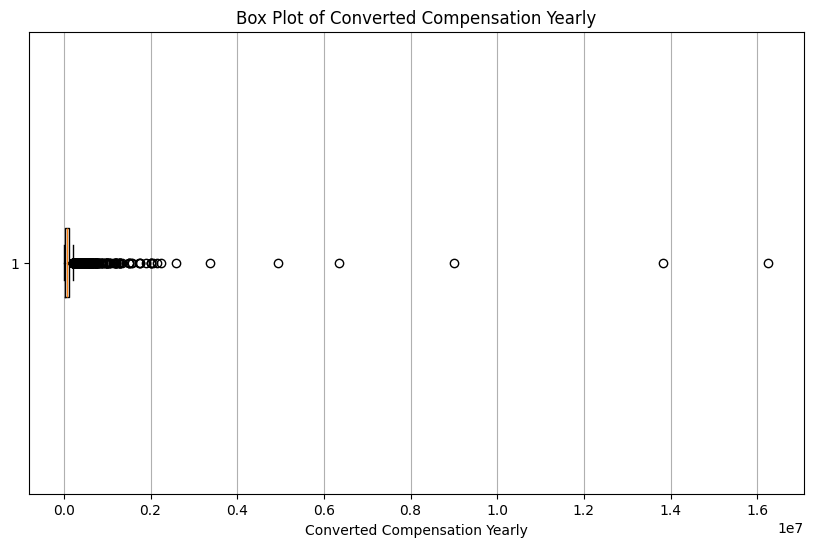

In [8]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]

df_clean = df.dropna(subset=['ConvertedCompYearly'])

# Print results
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')
print(f'Lower Bound for Outliers: {lower_bound}')
print(f'Upper Bound for Outliers: {upper_bound}')
print(f'Number of Outliers: {len(outliers)}')
print('Outlier Values:')
print('___________________________________________________________________________________')
print(outliers)

# Visualize with a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_clean['ConvertedCompYearly'], vert=False)
plt.title('Box Plot of Converted Compensation Yearly')
plt.xlabel('Converted Compensation Yearly')
plt.grid(axis='x')
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- 
- Validate the size of the new DataFrame.


In [9]:

# Create a new DataFrame excluding outliers
cleaned_df = df_clean[(df_clean['ConvertedCompYearly'] >= lower_bound) & (df_clean['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
original_size = df.shape[0]
cleaned_size = cleaned_df.shape[0]

print(f'Original DataFrame Size: {original_size}')
print(f'New DataFrame Size after removing outliers: {cleaned_size}')


Original DataFrame Size: 65437
New DataFrame Size after removing outliers: 22457


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


                          Age  ConvertedCompYearly  YearsCodePro    JobSat
Age                  1.000000             0.590190      1.000000  0.498209
ConvertedCompYearly  0.590190             1.000000      0.590190  0.245549
YearsCodePro         1.000000             0.590190      1.000000  0.498209
JobSat               0.498209             0.245549      0.498209  1.000000


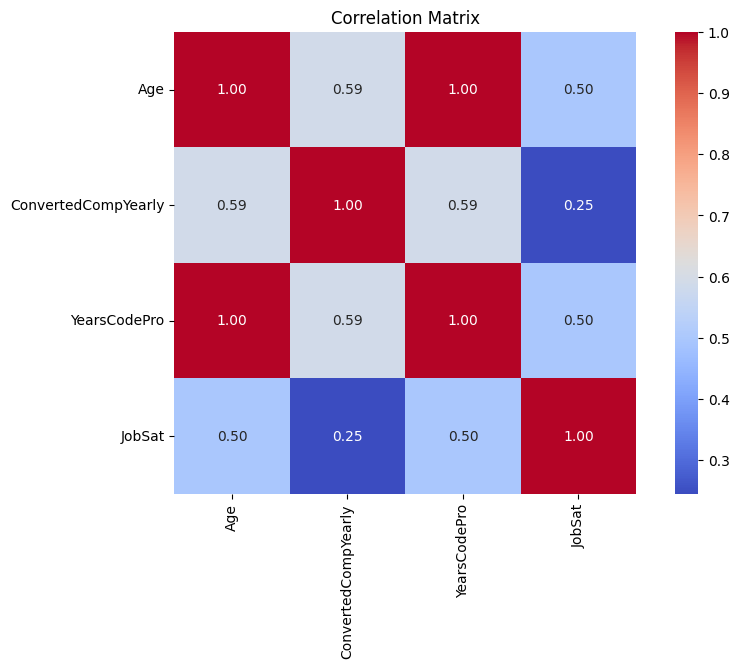

In [20]:
# Transform Age column to numeric values (convert strings to integers)
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')

# Compute the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix for reference
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
